# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем необходимые для работы с проектом библиотеку Pandas и модуль Pyplot библиотеки Matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузим данные из файла в датафрейм.

In [2]:
# Создадим датафрейм
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
# Ознакомимся с первыми 5 строками
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Изучим информацию о полученном датафрейме.

In [3]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# количество дубликатов
df.duplicated().sum()

0

#### Построим общую гистограмму для всех числовых столбцов таблицы.

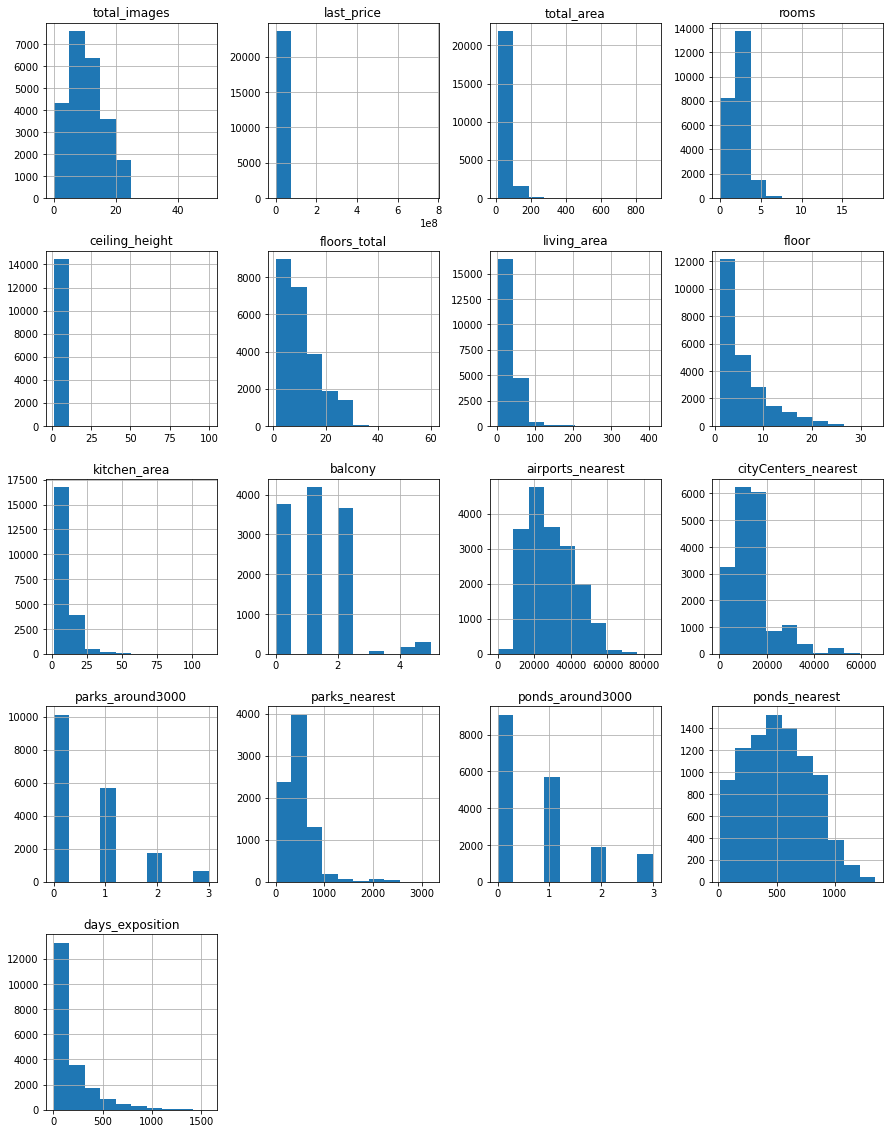

In [5]:
# Построим гистограмму
df.hist(figsize=(15, 20));

***

**Вывод**:

***В ходе изучения полученных данных выявлено, что в данных присутствует 23699 строк подразделенных на 21 столбец. В столбцах имеются пропущенные значения и указан неккоректный тип данных, при этом явные дубликаты отсутствуют. Анализ гистограмм показывает, что в данных имееются аномальные значения. Данные требуют обработки.***

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах. Заполним их там, где это возможно.

In [6]:
# Определим в каких столбцах есть пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**- Столбец** `'ceiling_height'` **- содержащий информацию о высоте потолков имеет множество отсутствующих значений. Для полноты данных лучше заменить их на медианные.** 

In [7]:
# Заменяем медианным значением отсутствующие данные
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].sort_values(ascending=False).head()

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
Name: ceiling_height, dtype: float64

**- Пропуски в столбце** `'floors_total'` **— с данными сколько всего этажей в доме, также заменим на медианные значения.** 

In [8]:
# Определим функцию
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return df[df['floor'] == row['floor']]['floors_total'].median()
        
df['f'] = df.apply(floors_total, axis=1) 
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = (df['f'] + df['floors_total']).astype('int')
df.drop('f', axis= 1 , inplace= True )
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

**- Пропуски в столбце** `'is_apartment'` **- апартаменты заполним знечением `False`, так как среднее значение указывает, что аппартаментов всего около 2 %, что явялется допустимым значением и возможно, данные не были указаны при заполнении анкет.**

In [9]:
#Вычислим среднее
df['is_apartment'].mean()

0.018018018018018018

In [10]:
#Заполним пропущенные значения
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

**- Пропуски в столбце** `'kitchen_area'` **- хранящим сведения о площади кухни, заменим значением `0`, так как явной зависимости с другими данными датафрейма не выявлено и возможно пользователи не указали площадь кухни в связи с ее отсутствием.**

In [11]:
#Определяем зависимость с помощью корреляции Пирсона
print(df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())

kitchen_area    1.000000
total_area      0.609121
last_price      0.519869
living_area     0.428674
rooms           0.269945
Name: kitchen_area, dtype: float64


In [12]:
#Заменим пропущенные значения на 0
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'].isna().sum()

0

**- Пропуски в столбце** `'balcony'` **- хранящим сведения о числе балконов, также заменим значением `0`, так как по аналогии с предыдущим столбцом явной зависимости с другими данными датафрейма не выявлено и возможно пользователи просто не указали число балконов в связи с их отсутствием.**

In [13]:
#Определяем зависимость с помощью корреляции Пирсона
print(df.corr().sort_values(by='balcony', ascending=False)['balcony'].head())

balcony         1.000000
floors_total    0.192026
floor           0.168773
total_images    0.121693
kitchen_area    0.114845
Name: balcony, dtype: float64


In [14]:
#Заменим пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(0)
df['kitchen_area'].isna().sum()

0

**- Cтолбец** `'parks_around3000'` **— хранит число парков в радиусе 3 км. Пропущенные значения возможно сигнализируют об отсутствии таковых в районе нахождения объекта. Заменим пропущенные данные на `0`**

In [15]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

**- Cтолбец** `'ponds_around3000'` **— хранит число водоемов в радиусе 3 км. Пропущенные значения возможно сигнализируют об отсутствии таковых в районе нахождения объекта. Заменим пропущенные данные на `0`**

In [16]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

#### Рассмотрим типы данных в каждом столбце. Преобразуем их при необходимости.

In [17]:
#Изучим используемые в датафрейме типы данных
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**- Столбец** `'last_price'` **—  хранящий данные о цене на момент снятия с публикации, имеет тип вещественного числа, при этом все строки стоблбца целочисленны, имеет смысл преобразования в тип данных 'int'.**

In [18]:
#Преобразуем в целочисленный тип данных
df['last_price'] = df['last_price'].astype('int')
df['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int64

**- Столбец** `'first_day_exposition'` **— хранящий дату публикации объявлений имеет неверный тип данных, приведем его в соответствие.**

In [19]:
#Выявление уникальных значений
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [20]:
#Приведем к типу данных 'datetime'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

**- Тип данных используемых в столбце** `'floors_total'` **- хранящим сведения о том сколько всего этажей в доме, имеет смысл преобразовать в целочисленный в связи с отсутствием в столбце вещественных значений.**

In [21]:
#Приведем к типу данных 'int'
df['floors_total'] = df['floors_total'].astype(int)
df['floors_total'].dtypes

dtype('int64')

**- Тип данных используемых в столбце** `'balcony'` **- хранящим сведения о числе балконов, имеет смысл преобразовать в целочисленный в связи с отсутствием в столбце вещественных значений.**

In [22]:
#Приведем к типу данных 'int'
df['balcony'] = df['balcony'].astype(int)
df['balcony'].dtypes

dtype('int64')

**- Cтолбец** `'parks_around3000'` **— хранящий сведения о числе парков в радиусе 3 км целесообразно привести к целочисленному типу для упрощения анализа.**

In [23]:
#Приведем к типу данных 'int'
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['parks_around3000'].dtypes

dtype('int64')

**- Тип данных используемых в столбце** `'ponds_around3000'` **- хранящим сведения о  числе водоёмов в радиусе 3 км, имеет смысл преобразовать в целочисленный в связи с отсутствием в столбце вещественных значений.**

In [24]:
#Приведем к типу данных 'int'
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df['ponds_around3000'].dtypes

dtype('int64')

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

**- Cтолбец** ```'locality_name'``` **— хранит название населённого пункта и имеет множество неявных дубликатов и пропусков. Перед их устранением приведем значения столбца к одному виду, применим нижний регистр. Устраним дубликаты связанные с буквой 'ё' и удалим типы оставив только названия. Пропуски заменим на значение** `'unknown'`.

In [25]:
# преобразуем в строчные буквы
df['locality_name'] = df['locality_name'].str.lower()

# Исключим типы и оставим только названия
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Отобразим уникальные значения в алфавитном порядке
set(df['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'городской большая ижора',
 'городской будогощь',
 'городской виллози',
 'городской лесогорский',
 'городской мга',
 'городской назия',
 'городской новоселье',
 'городской павлово',
 'городской рощино',
 'городской свирьстрой',
 'городской советский',
 'городской федоровское',
 'городской янино-1',
 'гости

In [26]:
#Заменим 49 пропущенных значений на значение 'unknown'
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].isna().sum()

0

#### Поиск и устранение редких и выбивающихся значений.

**- Столбец** `'ceiling_height'` **- согласно описанию содержит информацию о высоте потолков в метрах, а по факту отображен в сантиметрах. Исправим этот недостаток переносом запятой.** 

In [27]:
# Перенесем запятую
df.loc[df['ceiling_height'] >= 20.0, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

#### Данные оставленные без изменений.

**- Пропуски в столбце** `'living_area'`  **- хранящие данные о жилой площади, оставим без изменений в связи с невозможностью ее вычисления, из-за отсутствия данных о нежилой площади (жилая площадь = общая площадь - нежилая площадь);**

**- Незаполненные строки в столбце** `'airports_nearest'`  **- хранящем данные о расстояние до ближайшего аэропорта (м), предположительно указывают об отсутствии аэропорта либо о его большой удаленности. Оставим данные без изменений;**

**- Отсутствующие значения в столбце** `'cityCenters_nearest'`  **- хранящем данные о расстоянии до центра города (м), стоит оставить без изменений, в связи с возможностью нахождения объекта вне населенного пункта. Имеет смысл привести название столбца к общему виду сменив регистр на нижний;**

In [28]:
#изменим название столбца
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True)
df['city_centers_nearest'].head(0)

Series([], Name: city_centers_nearest, dtype: float64)

**- Пропущенные данные в столбце** `'parks_nearest'`  **- хранящем информацию о расстоянии до ближайшего парка (м), возможно информируют о нахождении объекта продажи на большом удалении, логично не вносить изменения в данные пропуски.**

**- Пропущенные данные в столбце** `'ponds_nearest'`  **- хранящем информацию о расстоянии до ближайшего водоёма (м), возможно информируют о нахождении объекта продажи на большом удалении, логично не вносить изменения в данные пропуски.**

**- Безинформационные строки в столбце** `'days_exposition'`  **- содержащим сведения о количестве дней размещения объявлений (от публикации до снятия), указывают на отсутствие информации о продаже объекта, которая пока не требует исправлений.**

___
**Вывод:**

***При предобработке данных, в датафрейме были выполнены следующие действия:***
1. ***К общему приведено название столбца cityCenters_nearest на city_centers_nearest;***
2. ***Уменьшены пропуски в следующих столбцах:***
|Пропуски | Было | Стало|
|-|-|-|
| ceiling_height | 9195 | 0 |
| floors_total | 86 | 0 |
| living_area | 1903 | 1903 |
| is_apartment | 20924 | 0 |
| kitchen_area | 2278 | 0 |
| balcony | 11519 | 0 |
| locality_name | 49 | 0 |
| airports_nearest | 5542 | 5542 |
| city_centers_nearest | 5519 | 5519 |
| parks_around3000 | 5518 | 0 |
| parks_nearest | 15620 | 15620 |
| ponds_around3000 | 5518 | 0 |
| ponds_nearest | 14589 | 14589 |
| days_exposition | 3181 | 3181 |
*Основными причинами пропусков могли стать:*
- *Человеческий фактор (пропустил, не увидел, отвлекся, забыл, не посчитал нужным и т.д.);*
- *Недоработка форм для заполнения данных (отсутствие обязательных полей и предлагаемых вариантов или просто проверки данных);*
- *Программный или аппаратный сбой. Обновление системы во время заполнения данных.*
3. ***В соответствии с данными находящимся в столбцах был изменен их тип:***
|Тип данных | Было | Стало| Причина |
|-|-|-|-|
| last_price | float64 | int64 | Содержит только целые числа |
| first_day_exposition | object | datetime64 | Содержит датачисленные значения |
| floors_total | float64 | int64 | Содержит только целые числа |
| is_apartment | object | bool | Содержит булевы значения |
| balcony | float64 | int64 | Содержит только целые числа |
| parks_around3000 | float64 | int64 | Содержит только целые числа |
| ponds_around3000 | float64 | int64 | Содержит только целые числа |

4. ***Произведен поиск уникальных значений, выявлены и устранены неявные дубликаты в столбце с названиями населенных пунктов.***
5. ***Исправлены значения в столбце с высотой потолоков, которое было отражено в неправильной метрической системе.***
6. ***Значения и пропуски в некоторых столбцах решено оставить без изменений в связи с невозможностью предложить им логическую замену.***

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец `price_square_meter` содержащий информацию о цене одного квадратного метра объекта, с точностью до двух знаков после запятой.

In [29]:
# Добавим столбец
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

#### Добавим столбец `day_publication` содержащий информацию о дне недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [30]:
# Добавим столбец
df['day_publication'] = df['first_day_exposition'].dt.weekday 
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

#### Добавим столбец `month_publication` содержащий информацию о месяце публикации объявления.

In [31]:
# Добавим столбец
df['month_publication'] = df['first_day_exposition'].dt.month 
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

#### Добавим столбец `year_publication` содержащий информацию о годе публикации объявления.

In [32]:
# Добавим столбец
df['year_publication'] = df['first_day_exposition'].dt.year 
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

#### Добавим столбец `type_apartment_floor` содержащий информацию о типе этажа квартиры (значения — «первый», «последний», «другой»).

In [33]:
# Определим функцию
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Добавим столбец
df['type_apartment_floor'] = df.apply(floor, axis=1) 
df['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

#### Добавим столбец `distance_city_center`  содержащий информацию о расстоянии до центра города в километрах (переведём из (м) в (км) и округлим до ближайших целых значений).

In [34]:
# Добавим столбец
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

**Вывод:**
Для проведения следующего этапа в таблицу датафрейма были Добавлены новые столбцы:
- price_square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой;
- day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- month_publication - месяц публикации объявления;
- year_publication - год публикации объявления;
- type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»);
- distance_city_center - расстояние до центра города в целых километрах.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение параметров обеъктов. 
*Изучим и опишем зависимости между количеством недвижимости и другими параметрами объектов продаж.*

##### Произведем анализ сведений об общей площади хранящихся в `df['total_area']`, через описательную статистику и диаграмму.

In [35]:
# Получим статистические данные
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

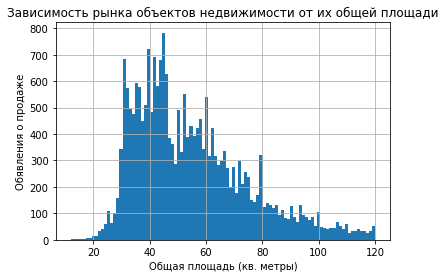

In [36]:
# Построим диаграмму
plt.hist(df['total_area'], bins=100, range=(12,120))
plt.title('Зависимость рынка объектов недвижимости от их общей площади')
plt.xlabel('Общая площадь (кв. метры)')
plt.ylabel('Обявления о продаже')
plt.grid(True)
plt.show()

Вывод:
*Самый популярный диапазон недвижимости представленной на рынке имеет общую площадь от 30 до 65 кв.метров, в пике примерно 45 кв.метров.*

##### Произведем анализ сведений о жилой площади, хранящихся в `df['living_area']`, через описательную статистику и диаграмму.

In [37]:
# Получим статистические данные
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

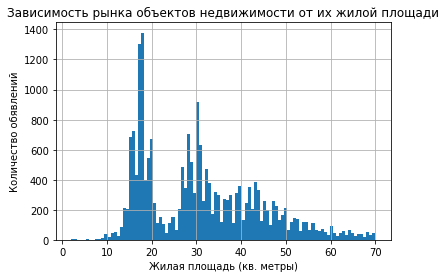

In [38]:
# Построим диаграмму
plt.hist(df['living_area'], bins=100, range=(2,70))
plt.title('Зависимость рынка объектов недвижимости от их жилой площади')
plt.xlabel('Жилая площадь (кв. метры)')
plt.ylabel('Количество обявлений')
plt.grid(True)
plt.show()

Вывод:
*Болше всего предложений у недвижимости с жилой площадью в районе 18 кв.метров и 35 кв.метров, в зоне 24 кв.метра отмечен сильный спад преложений.*

##### Произведем анализ сведений о площади кухни, хранящихся в `df['kitchen_area']`, через описательную статистику и диаграмму.

In [39]:
# Получим статистические данные
df['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

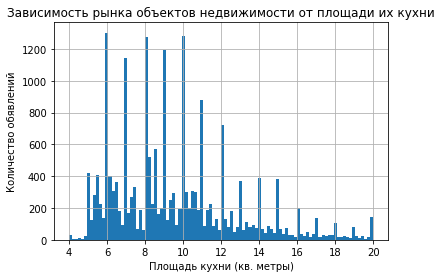

In [40]:
# Построим диаграмму
plt.hist(df['kitchen_area'], bins=100, range=(4,20))
plt.title('Зависимость рынка объектов недвижимости от площади их кухни')
plt.xlabel('Площадь кухни (кв. метры)')
plt.ylabel('Количество обявлений')
plt.grid(True)
plt.show()

Вывод:
*Больше всего предложений у недвижимости с площадью кухни 6, 7, 8, 9, 10, 11 и 12 кв.метров. Стоит отметить тот факт, что при указании площади кухни, пользователи самостоятельно округляют значения до целых чисел.*

##### Произведем анализ сведений о цене, хранящихся в `df['last_price']`, через описательную статистику и диаграмму.

In [41]:
# Получим статистические данные
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

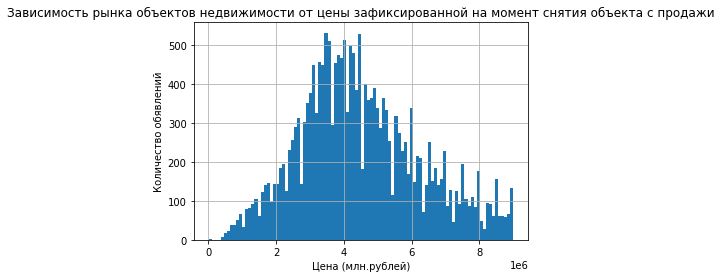

In [42]:
# Построим диаграмму
plt.hist(df['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость рынка объектов недвижимости от цены зафиксированной на момент снятия объекта с продажи')
plt.xlabel('Цена (млн.рублей)')
plt.ylabel('Количество обявлений')
plt.grid(True)
plt.show()

Вывод:
*В наиболее массовых предложениях о продаже недвижимости указана цена от 3 до 5 млн.рублей.*

##### Произведем анализ сведений о количестве комнат, хранящихся в `df['rooms']`, через диаграмму.

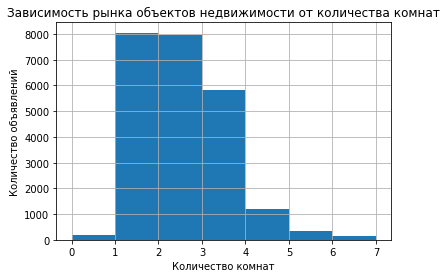

In [43]:
# Построим диаграмму
plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Зависимость рынка объектов недвижимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Среди предложений наибольшее распространение имеют одно и двухконмнатные квартиры. Прогрессия уменьшается с увеличением количества комнат.*

##### Произведем анализ сведений о высоте потоков, хранящихся в `df['ceiling_height']`, через описательную статистику и диаграмму.

In [44]:
# Получим статистические данные
df['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

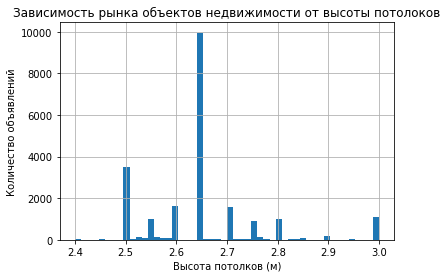

In [45]:
# Построим диаграмму
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость рынка объектов недвижимости от высоты потолоков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Абсолютным лидером среди предложений недвижимости являются объекты с высотой потолоков в 2.65 и в 2.5 метра. Остальные объекты не выходят за пределы 2 тысяч обявлений.*

##### Произведем анализ сведений об этаже расположения, хранящихся в `df['floor']`, через описательную статистику и диаграмму.

In [46]:
# Получим статистические данные
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

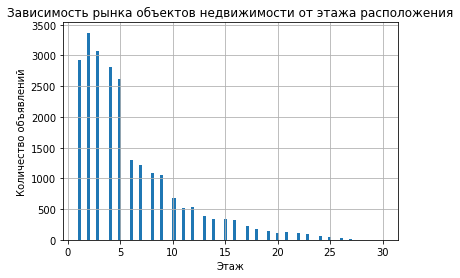

In [47]:
# Построим диаграмму
plt.hist(df['floor'], bins=100, range=(1,30))
plt.title('Зависимость рынка объектов недвижимости от этажа расположения')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Основная часть объектов недвижимости расположена с первого по пятый этаж. Шестой этаж имеет в два раза меньше предложений чем пятый, и далее с увеличением этажа количество предложений снижается почти линейно*

##### Произведем анализ сведений о типе этажа расположения («первый», «последний», «другой»), хранящихся в `df['type_apartment_floor']`, через описательную статистику и диаграмму.

In [48]:
# Получим статистические данные
df['type_apartment_floor'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: type_apartment_floor, dtype: object

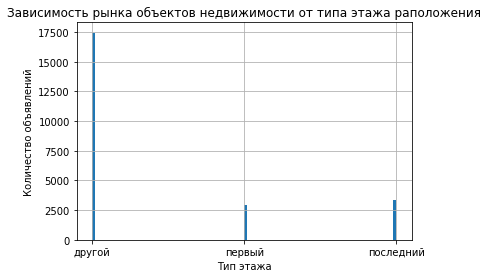

In [49]:
# Построим диаграмму
plt.hist(df['type_apartment_floor'], bins=100, range=(0,2))
plt.title('Зависимость рынка объектов недвижимости от типа этажа раположения')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Количество объявлений с недвижимость расположеной на крайних этажах также имеет низкую долю от общего количества.*

##### Произведем анализ сведений об общем колличестве этажей, хранящихся в `df['floors_total']`, через описательную статистику и диаграмму.

In [50]:
# Получим статистические данные
df['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

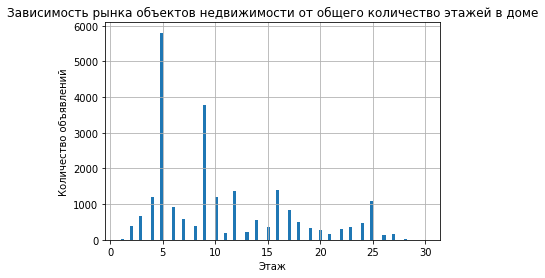

In [51]:
plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость рынка объектов недвижимости от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Лидерами среди предложений недвижимости являются объекты расположенные в пятиэтажных, а затем в девятиэтажных домах.*

##### Произведем анализ сведений о расстоянии до центра города в метрах, хранящихся в `df['city_centers_nearest']`, через описательную статистику и диаграмму.

In [52]:
# Получим статистические данные
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

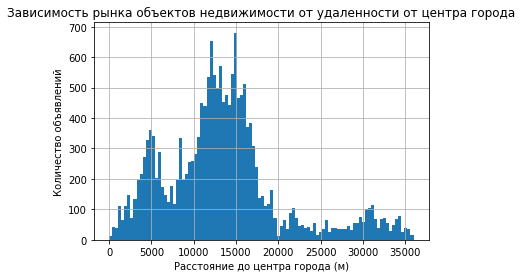

In [53]:
# Построим диаграмму
plt.hist(df['city_centers_nearest'], bins=100, range=(0,35968))
plt.title('Зависимость рынка объектов недвижимости от удаленности от центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Согласно диаграмме больше всего предложений о продаже имеют объекты недвижимости находящиеся на расстоянии 12000-17000 метров от центра населенного пункта (возможно основная масса это спальные районы располагающиеся на окраинах). Также имеется значительный всплеск предложений для объектов расположенных на расстоянии в районе 5000 метров от центра.*

##### Произведем анализ сведений о расстоянии до ближайшего аэропорта, хранящихся в `df['airports_nearest']`, через описательную статистику и диаграмму.

In [54]:
# Получим статистические данные
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

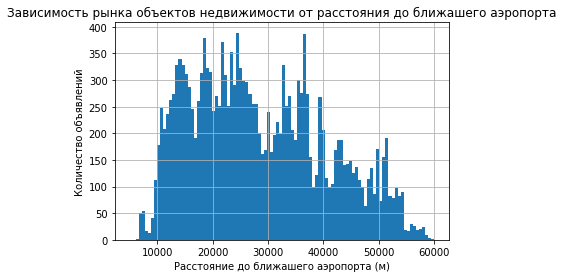

In [55]:
# Построим диаграмму
plt.hist(df['airports_nearest'], bins=100, range=(5000,60000))
plt.title('Зависимость рынка объектов недвижимости от расстояния до ближашего аэропорта')
plt.xlabel('Расстояние до ближашего аэропорта (м)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Согласно диаграмме основная масса предложений о продаже недвижимости опубликована для объектов расположенных на расстоянии 10000-40000 метров до ближайшего аэропорта.*

##### Произведем анализ сведений о расстоянии до ближайшего парка, хранящихся в `df['parks_nearest']`, через описательную статистику и диаграмму.

In [56]:
# Получим статистические данные
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

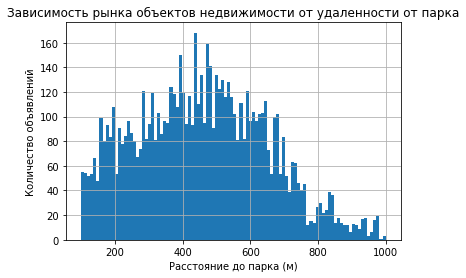

In [57]:
# Построим диаграмму
plt.hist(df['parks_nearest'], bins=100, range=(100,1000))
plt.title('Зависимость рынка объектов недвижимости от удаленности от парка')
plt.xlabel('Расстояние до парка (м)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Согласно диаграмме основная масса предложений о продаже недвижимости опубликована для объектов расположенных на расстоянии 100-700 метров до ближайшего парка.*

##### Произведем анализ сведений о дне и месяце публикации объявления, хранящихся в `df['day_publication']` и в `df['month_publication']`, через описательную статистику и диаграмму.

In [58]:
# Получим статистические данные
# Для дня недели
print('День недели')
print(df['day_publication'].describe())
print()

# Для месяца
print('Месяц')
df['month_publication'].describe()

День недели
count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_publication, dtype: float64

Месяц


count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

День недели


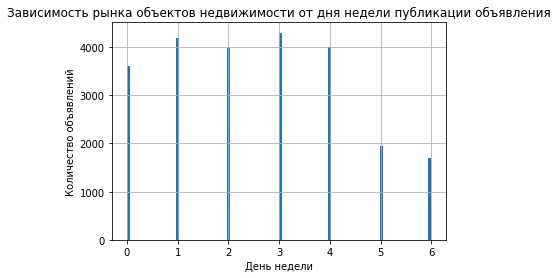

None

Месяц


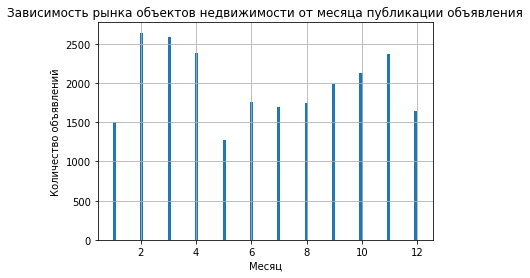

In [59]:
# Построим диаграмму 

# Для дня недели
print('День недели')
plt.hist(df['day_publication'], bins=100, range=(0,6))
plt.title('Зависимость рынка объектов недвижимости от дня недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.grid(True)
print(plt.show())
print()

# Для месяца
print('Месяц')
plt.hist(df['month_publication'], bins=100, range=(1,12))
plt.title('Зависимость рынка объектов недвижимости от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

Вывод:
*Можно отметить, что в будни публикация объявлений происходит граздо чаще чем в выходные. Среди месяце лидируют такие как февраль, март и апрель, а в мае происходит провал, который линейно возрастает от месяца к месяцу до  четвертого по популярности месяца - ноября.*

**В заключении:** 
*Проведя анализ представленных данных можно предположить, что среднестатистическое предложение - это скорее всего однокомнатная или двухкомнатная квартира, с небольшой площадью комнат,  в пятиэтажном доме, средней площадью 52 кв. метра, с кухней в 6 кв. метров, высотой потолков 2,65 метра, расположеной на удалении 13 км. от центра.*

#### Изучим, как быстро продавались квартиры. 
*Изучим столбец `'days_exposition'`, который показывает, сколько дней было размещено каждое объявление.*

##### Построим гистограмму.

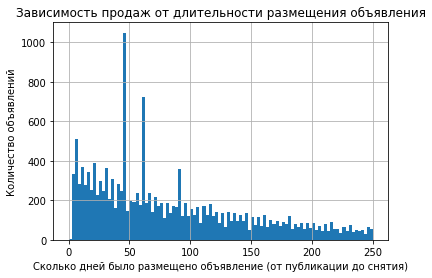

In [60]:
# Построим гстограмму 
plt.hist(df['days_exposition'], bins=100, range=(0,250))
plt.title('Зависимость продаж от длительности размещения объявления')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

##### Посчитаем средние и медианные значения.

In [61]:
# Получим статистические данные
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### Вывод:

   - *Среднее значение снятия с публикации объявлений и как следстие возможность продажи выставленного объекта недвижимости составляет 180 дней против медианного значения в 95 дней. Среднее значение более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.*
   - *Продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов (площади, цены, удалённости от центра).*
   - *Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи, или осуществляются после 232 дня и более (после 3 квартиля), или вообще могут быть не неосуществленны.*

In [62]:
# Применим корреляцию
print('Корреляция:','\n')
(
    print
        (
            df.pivot_table
                (
                    index='floor', 
                    values=['last_price',
                            'total_area',
                            'living_area',
                            'kitchen_area',
                            'rooms']
                )
            .corr(),'\n'
        )
)

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.284824     0.149369  0.177180    0.454583
last_price        0.284824    1.000000     0.655849  0.442449    0.738972
living_area       0.149369    0.655849     1.000000  0.897739    0.923741
rooms             0.177180    0.442449     0.897739  1.000000    0.811538
total_area        0.454583    0.738972     0.923741  0.811538    1.000000 



**Промежуточный вывод:**

*Корреляция по данным указывает, что прямой зависимости среди данных нет. Возможно это произошло из за наличия большого количества редких и выбивающихся значений.
Проведем обработку этих значений.*

In [63]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    df[col] = quartile_range(df, col)

In [64]:
# Повторно применим корреляцию
print('Корреляция:','\n')
(
    print
        (
            df.pivot_table
                (
                    index='floor', 
                    values=['last_price',
                            'total_area',
                            'living_area',
                            'kitchen_area',
                            'rooms']
                )
            .corr(),'\n'
        )
)

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.507438    -0.108534 -0.132606    0.342559
last_price        0.507438    1.000000     0.725857  0.551637    0.905255
living_area      -0.108534    0.725857     1.000000  0.901722    0.917353
rooms            -0.132606    0.551637     0.901722  1.000000    0.786100
total_area        0.342559    0.905255     0.917353  0.786100    1.000000 



**Предварительный вывод:**

*Значения, датафрейма c отброшеными значениями на основе 1.5 размаха, стали лучше и адекватнее. 
Прослеживается почти прямая зависимость между ценой и общей площадью, а также ценой и количеством комнат.*

*Присутствует слабая зависимость между ценой и площадью кухни.*

*В остальных значениях прямая зависимость не прослеживается.*

##### Зависимость от общей площади.

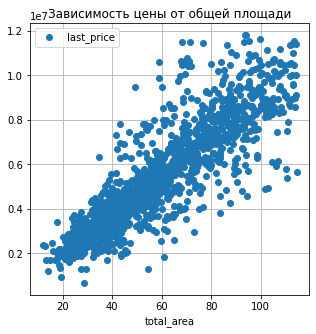

In [65]:
# Построим гистограмму
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

##### Зависимость от жилой площади.

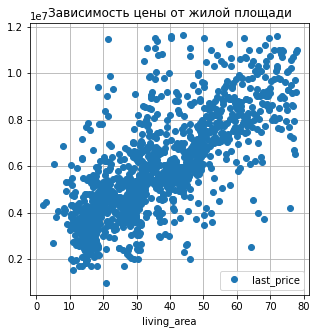

In [66]:
# Построим гистограмму
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

##### Зависимость от площади кухни.

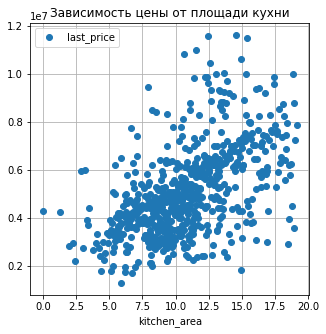

In [67]:
# Построим гистограмму
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

##### Зависимость от числа комнат.

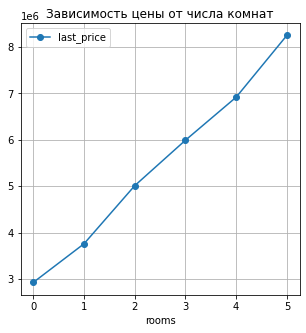

In [68]:
# Построим гистограмму
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

##### Зависимость от типа расположения этажа.

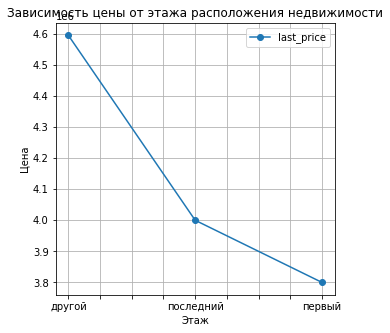

In [69]:
# Построим диаграмму зависимости
(
    df.pivot_table
        (
            index='type_apartment_floor', 
            values='last_price', 
            aggfunc='median'
        )
            .sort_values
                (
                    by='last_price', 
                    ascending=False
                )
            .plot
                (
                    grid=True, 
                    style='o-', 
                    figsize=(5, 5), 
                    title='Зависимость цены от этажа расположения недвижимости'
                )
)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

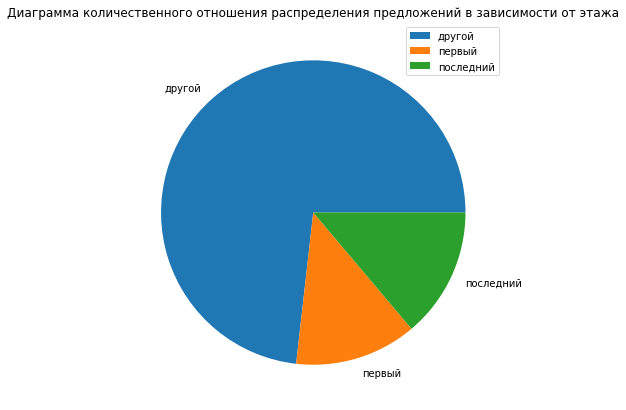

In [70]:
# Построим диаграмму распределения
(
    df.pivot_table
        (
            index='type_apartment_floor',
            values='last_price',
            aggfunc='count'
        )
        .plot.pie
            (
                y='last_price', 
                figsize=(10,7), 
                label='', 
                title='Диаграмма количественного отношения распределения предложений в зависимости от этажа'
            )
)
plt.show()

##### Зависимость от дня публикации.

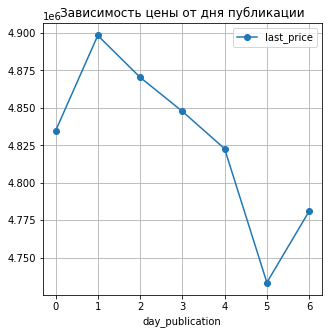

In [71]:
# Построим гистограмму
(
    df.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

##### Зависимость от месяца публикации.

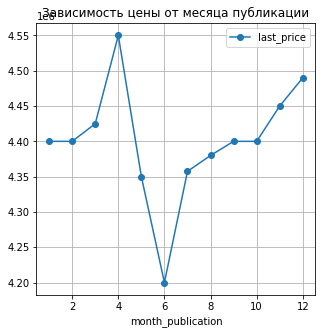

In [72]:
# Построим гистограмму
(
    df.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

##### Зависимость от года публикации.

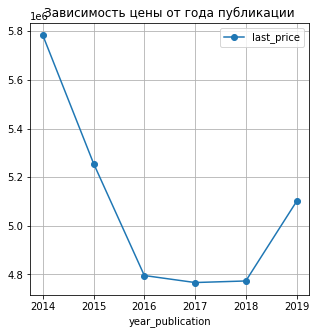

In [73]:
# Построим гистограмму
(
    df.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

**Вывод:**

*Предварительные выводы нашли свое подтверждение:*

* *Имеется прямая зависимость между ценой на объект недвижимости и его площадью. Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.*

* *Количество комнат также прямо влияет на цену, но только в связке: чем больше комнат, тем больше жилая площадь и соответственно тем  больше цена. Если недвижемость имеет комнат меньше, но они больше по площади, или недвижемость находится в центре, то зависимость не работает.*

* *Расположение объекта недвижимости относительно этажа имеет сильную зависимость от цены. Меннее ценятся объекты расположенные на последнем этаже, а еще менее объеткы на первых этажах. Количество объявлений с недвижимость расположеной на крайних этажах также имеет низкую оценку от общего количества.*



#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

**Данные возьмем из столбца** `'locality_name'`.

In [74]:
# Посчитаем среднее
price_sm_name = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm_name.columns = ['count']
price_sm_name = price_sm_name.sort_values(by='count', ascending=False).head(10)
price_sm_name['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sm_name.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,13737,114849.01
пушкин,338,103125.82
кудрово,470,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,336,75424.58
гатчина,305,68746.15
всеволожск,397,68654.47


**Вывод:**

*Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие. Из топ-10 наименьшая стоимость в небольшом по численности населения Выборге, расположенном на большом расстоянии от Санкт-Петербурга.*

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра при удалении от центра города.

**Данные возьмем из столбца** `'locality_name'`.

In [75]:
# Получим статистические данные
df.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

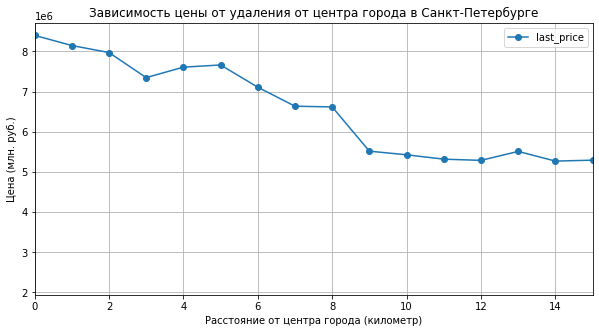

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


In [76]:
# Построим гистограмму и таблицу зависимости
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
df.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

**Вывод:**

*Самая высокая цена на недвижимость, располагающуюся в центре города. Ее стоимость уменьшается пропорционально увеличению расстояния от центра города до 7 километров, далее стоимость уже не зависит от удаления.*

### Общий вывод

***В процессе работы над проектом по исследованию данных сервиса Яндекс Недвижимость, а именно архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, была выполнена предобработка данных и изучены ее результаты, что позволило найти интересные особенности и зависимости, которые существуют на рынке недвижимости. А именно:***

**Шаг 1. Открыт файл с данными и изучена общая информация.**

В ходе изучения полученных данных выявлено, что в данных присутствует 23699 строк подразделенных на 21 столбец. В столбцах имеются пропущенные значения и указан неккоректный тип данных, при этом явные дубликаты отсутствуют. Анализ гистограмм показл, что в данных имееются аномальные значения и данные требуют обработки.

**Шаг 2. Выполнена предобработка данных.**

При предобработке данных, в датафрейме были выполнены следующие действия:
1. Были уменьшены пропуски в столбцах. Основными причинами пропусков могли стать:
    - Человеческий фактор (пропустил, не увидел, отвлекся, забыл, не посчитал нужным и т.д.);
    - Недоработка форм для заполнения данных (отсутствие обязательных полей и предлагаемых вариантов или просто проверки данных);
    - Программный или аппаратный сбой. Обновление системы во время заполнения данных.;
2. В соответствии с данными находящимся в столбцах был изменен их тип;
3. Произведен поиск уникальных значений, выявлены и устранены неявные дубликаты в столбце с названиями населенных пунктов;
4. Исправлены значения в столбце с высотой потолоков, которое было отражено в неправильной метрической системе;
5. Значения и пропуски в некоторых столбцах решено оставить без изменений в связи с невозможностью предложить им логическую замену. К общему приведено название столбца cityCenters_nearest на city_centers_nearest.

**Шаг 3. В таблицу были добавлены новые столбцы.**

Добавлены новые столбцы в таблицу для проведения следующего этапа:
- price_square_meter - цена квадратного метра объекта с точностью до двух знаков после запятой;
- day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- month_publication - месяц публикации объявления;
- year_publication - год публикации объявления;
- type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»);
- distance_city_center - расстояние до центра города в целых километрах;

**Шаг 4. Проведен исследовательский анализ данных.**

1. **Изучены параметров объектов.**
Изучены и описаны зависимости между количеством недвижимости и другими параметрами объектов продаж, сделаны следующие выводы:
- Самый популярный диапазон недвижимости представленной на рынке имеет общую площадь от 30 до 65 кв.метров, в пике примерно 45 кв.метров.
- Болше всего предложений у недвижимости с жилой площадью в районе 18 кв.метров и 35 кв.метров, в зоне 24 кв.метра отмечен сильный спад преложений.
- Больше всего предложений у недвижимости с площадью кухни 6, 7, 8, 9, 10, 11 и 12 кв.метров. Стоит отметить тот факт, что при указании площади кухни, пользователи самостоятельно округляют значения до целых чисел.
- В наиболее массовых предложениях о продаже недвижимости указана цена от 3 до 5 млн.рублей.
- Среди предложений наибольшее распространение имеют одно и двухконмнатные квартиры. Прогрессия уменьшается с увеличением количества комнат.
- Абсолютным лидером среди предложений недвижимости являются объекты с высотой потолоков в 2.65 и в 2.5 метра. Остальные объекты не выходят за пределы 2 тысяч обявлений.
- Основная часть объектов недвижимости расположена с первого по пятый этаж. Шестой этаж имеет в два раза меньше предложений чем пятый, и далее с увеличением этажа количество предложений снижается почти линейно.
- Количество объявлений с недвижимость расположеной на крайних этажах также имеет низкую долю от общего количества.
- Лидерами среди предложений недвижимости являются объекты расположенные в пятиэтажных, а затем в девятиэтажных домах.
- Больше всего предложений о продаже имеют объекты недвижимости находящиеся на расстоянии 12000-17000 метров от центра населенного пункта (возможно основная масса это спальные районы располагающиеся на окраинах). Также имеется значительный всплеск предложений для объектов расположенных на расстоянии в районе 5000 метров от центра.
- Основная масса предложений о продаже недвижимости опубликована для объектов расположенных на расстоянии 10000-40000 метров до ближайшего аэропорта.
- Согласно диаграмме основная масса предложений о продаже недвижимости опубликована для объектов расположенных на расстоянии 100-700 метров до ближайшего парка.
- Можно отметить, что в будни публикация объявлений происходит граздо чаще чем в выходные. Среди месяце лидируют такие как февраль, март и апрель, а в мае происходит провал, который линейно возрастает от месяца к месяцу до четвертого по популярности месяца - ноября.
- Проведя анализ представленных данных можно предположить, что среднестатистическое предложение - это скорее всего однокомнатная или двухкомнатная квартира, с небольшой площадью комнат, в пятиэтажном доме, средней площадью 52 кв. метра, с кухней в 6 кв. метров, высотой потолков 2,65 метра, расположеной на удалении 13 км. от центра.
2. **Изучена скорость продаважи квартир.**
Сделаны выводы:
- Среднее значение снятия с публикации объявлений и как следстие возможность продажи выставленного объекта недвижимости составляет 180 дней против медианного значения в 95 дней. Среднее значение более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
- Продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов (площади, цены, удалённости от центра).
- Быстрыми продажами можно считать продажи состоявшиеся за 45 дней (в первом квартиле), а необычно долгие продажи, или осуществляются после 232 дня и более (после 3 квартиля), или вообще могут быть не неосуществленны.
3. **Изучено какие факторы больше всего влияют на общую (полную) стоимость объекта.**
Сделаны выводы:
- Имеется прямая зависимость между ценой на объект недвижимости и его площадью. Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.
- Количество комнат также прямо влияет на цену, но только в связке: чем больше комнат, тем больше жилая площадь и соответственно тем больше цена. Если недвижемость имеет комнат меньше, но они больше по площади, или недвижемость находится в центре, то зависимость не работает.
- Расположение объекта недвижимости относительно этажа имеет сильную зависимость от цены. Менее ценятся объекты расположенные на последнем этаже, а еще менее объеткы на первых этажах. Количество объявлений с недвижимость расположеной на крайних этажах также имеет низкую оценку от общего количества.
4. **Посчитана средня цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**
Сделан вывод:
Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие. Из топ-10 наименьшая стоимость в небольшом по численности населения Выборге, расположенном на большом расстоянии от Санкт-Петербурга.
5. **Выделены квартиры в Санкт-Петербурге и вычислены средние цены каждого километра при удалении от центра города.**
Сделан вывод:
Самая высокая цена на недвижимость, располагающуюся в центре города. Ее стоимость уменьшается пропорционально увеличению расстояния от центра города до 7 километров, далее стоимость уже не зависит от удаления.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод